In [8]:
# Unsupervised Learninig
## Creating Customer Segments
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [9]:
display(data.describe())


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5181,22044,21531,1740,7353,4985
1,834,11577,11522,275,4027,1856
2,6338,2256,1668,1492,311,686


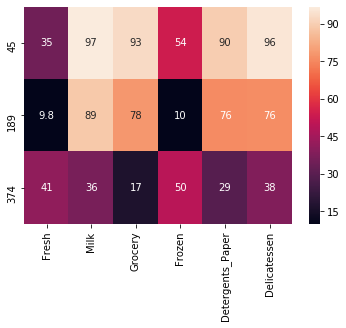

In [15]:
# Implementation: Selecting Sample
indices = [45, 189, 374]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

import seaborn as sns

percentiles_data = 100*data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
sns.heatmap(percentiles_samples, annot=True)

In [18]:
# Implementation: Feature Relevance

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
def score_feature(data, feature):
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeRegressor
    
    new_data = data.drop([feature], axis=1)

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    all_scores = []
    
    for i in range (100):
        X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25)

        # TODO: Create a decision tree regressor and fit it to the training set

        regressor = DecisionTreeRegressor()
        regressor.fit(X_train, y_train)

        # TODO: Report the score of the prediction using the testing set
        all_scores.append(regressor.score(X_test, y_test))
        
    score = np.mean(all_scores)
    print("For feature \"{}\", the coefficient of determination is {}".format(feature, score))


for key in data:
    score_feature(data, key)


For feature "Fresh", the coefficient of determination is -0.7643183723630027
For feature "Milk", the coefficient of determination is 0.029113962928450015
For feature "Grocery", the coefficient of determination is 0.6694769319893122
For feature "Frozen", the coefficient of determination is -1.4643870605770661
For feature "Detergents_Paper", the coefficient of determination is 0.6329327065965213
For feature "Delicatessen", the coefficient of determination is -2.99889705377677


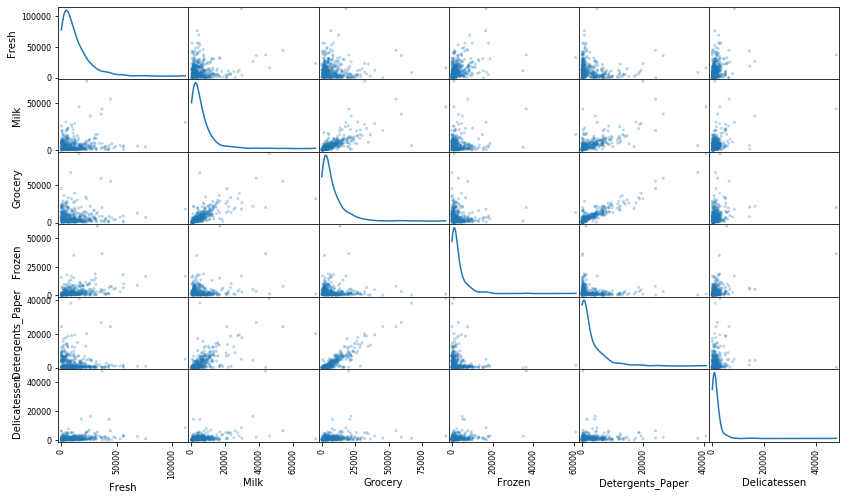

In [20]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
